In [ ]:
import numpy as np
from numpy import exp, sin, pi, shape
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

## Simulação


In [ ]:
# parâmetros
L = 5
T = 1

h = 1 #define os espaçamentos dx
k = 0.25  #define os espaçamentos dt  ##para h=0.6 e k até 0.255 , rho se comporta bem, em 0.26.. já começa a colapçar
steps = 25
#stepsx = int(L/h)
#stepst = int(T/k)

#parametros
D0 = 1.5
k1 = 0.5
k2 = 0.1 #k2 provoca alteração no pico de densidade do espaço
r1 = 0.05
r2 = 0.03
N0 = 1
#k/h**2      #para verificar as estabilidade, esse fator tem que sem inferior a 0.5

#malha/mesh
#x = np.linspace(0, L, steps)
#t = np.linspace(0, T, steps)    # mesh points in time
x = np.linspace(0, L, steps)
t = np.linspace(0, T, steps)
n = len(x)
m = len(t)

pr = T/5
pK = T/5
#funções conhecidas do problema
K = k1 + k2*sin(2*pi*t / pK)  #capacidade suporte periódica / subamortecida
r = r1 + r2*sin(2*pi*t / pr)   #taxa de crescimento
#D = D0*exp(- K * x**2)*np.ones((n,m) )   #difusividade

D = np.zeros((n,m)) #difusividade
for i in range(n):
  for j in range(m):
    #print(i,j)
    D[i,j] = D0* exp(-K[j]*x[i]**2)


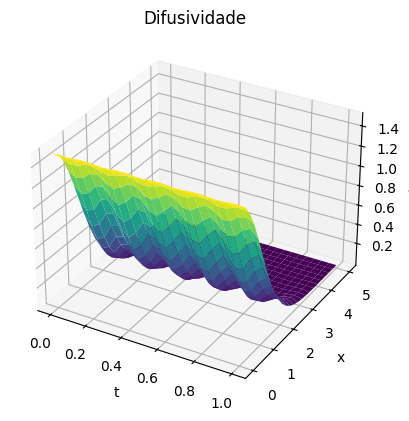

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.

T, X = np.meshgrid(t, x)
Z = D
# Plot the surface.
surf = ax.plot_surface(T, X, Z, cmap='viridis', linewidth=0.5)

#ax.set_xlim(0.9,1) #funciona, mas fica bizzaro!

ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("D(x,t)")
ax.set_title("Difusividade")
#lista de cores #https://matplotlib.org/stable/users/explain/colors/colormaps.html
# referencia do codigo: #https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py
plt.show()

In [ ]:
A1 = np.zeros((n,m))
A2 = np.zeros((n,m))

for i in range(n-1):
  for j in range(1,m-1):
    #print(i,j)
    A1[i+1,j] = (D[i+1,j] -  D[i,j])*k/(2*h**2)
    A2[i+1,j] = (D[i+1,j] +  D[i-1,j])*k/(2*h**2)


In [ ]:
u = 2

CI = N0/2*L    #(L+abs(x))   # condição inicial
CC = [0, 0]  #Condições de contorno / alterar os valores altera a forma da interação nas fronteiras
rho = np.zeros((n,m))   #define a matriz rho/densodade populacional

rho[0,:] = CC[0]          #coloca as CC nos extremos
rho[-1,:] = CC[1]
rho[:,0] = CI              #coloca as condições iniciais

for i in range(1,n-1):
  for j in range(m-1):

    rho[i,j+1] = rho[i+1,j]*(A1[i+1,j] + A2[i+1,j]) + rho[i,j]*(1 - 2*A2[i+1,j]) + rho[i-1,j]*(A2[i+1,j] - A1[i+1,j]) + r[j]*k*rho[i,j]**u


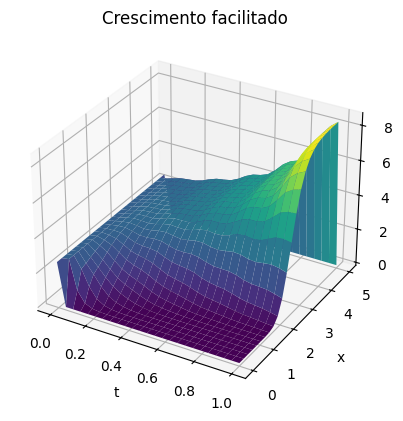

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.

T, X = np.meshgrid(t, x)
Z = rho
# Plot the surface.
surf2 = ax.plot_surface(T, X, Z, cmap='viridis', linewidth=0)

#ax.set_xlim(0.9,1) #funciona, mas fica bizzaro!

ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("D(x,t)")
ax.set_title("Crescimento facilitado")
#lista de cores #https://matplotlib.org/stable/users/explain/colors/colormaps.html
# referencia do codigo: #https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py

plt.savefig('cresc_facilitado_k1_05_k2_01.png')
plt.show()